# Setup

Allows for Google Colab to access Drive Files

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

!pip install dask[dataframe]

Mounted at /content/drive
     |████████████████████████████████| 112kB 6.5MB/s 


Loads in all data as 1 pandas dataframe (usually take a bit to execute)

In [ ]:
import dask.dataframe as dd
import numpy as np
import pandas as pd
import time

file = '/content/drive/MyDrive/parsed_adsb_csvs/*.csv'
cols = ['Icao','Alt', 'Lat','Long', 'PosTime', 'Species']
# read data frame from csv files
train_df = dd.read_csv(file, dtype = {'Alt': 'uint16', 'Lat': 'float32', 'Long': 'float32', 'PosTime': 'int64', 'Species': 'uint8'}, usecols = cols) 

train_df = train_df.compute()
print(train_df)


         Icao    Alt        Lat        Long        PosTime  Species
0      A82B72   3500  39.717903  -84.619019  1596672029381        1
1      A80E46  31000  61.336498 -140.995438  1596672028022        1
2      A4E2E5    700  42.145557  -72.719398  1596672029830        1
3      A4BDB9  15600  33.516727  -79.442421  1596672029378        1
4      A4C3CE    650  32.965118  -96.833878  1596672030885        1
...       ...    ...        ...         ...            ...      ...
21479  C821F8  17975 -41.125225  175.051468  1596758412576        1
21480  C8234A  18500 -37.852840  174.806625  1596758411374        1
21481  ACC040  28000  42.272324  -87.846115  1596758411880        1
21482  A7D222   6900  29.646700  -98.126343  1596757702853        1
21483  345292  32000  51.857941    5.114062  1596758411877        1

[29374631 rows x 6 columns]


Arrange in order of the Icao number

In [ ]:

train_df = train_df.sort_values(by=['Icao', 'PosTime'])
train_df = train_df.reset_index(drop = True)
print(train_df)

            Icao   Alt        Lat       Long        PosTime  Species
0         001000  2175  48.106934  11.258926  1596721377840        1
1         001000  2175  48.106934  11.258926  1596721392353        1
2         001000  2175  48.106934  11.258926  1596721394847        1
3         001000  2175  48.109818  11.264557  1596721444191        1
4         001000  2175  48.105652  11.257416  1596721470866        1
...          ...   ...        ...        ...            ...      ...
29374626  F00000   450  49.149822   2.394817  1596742711592        1
29374627  F00000   300  49.149822   2.394817  1596742711592        1
29374628  F00000   200  49.149822   2.394817  1596742711592        1
29374629  F00000   175  49.149822   2.394817  1596742711592        1
29374630  F00000   175  49.149822   2.394817  1596742711592        1

[29374631 rows x 6 columns]


Perform min- max normalization

In [ ]:
max_lat = train_df['Lat'].max()
min_lat = train_df['Lat'].min()
max_lon = train_df['Long'].max()
min_lon = train_df['Long'].min()
max_alt = train_df['Alt'].max()
min_alt = train_df['Alt'].min()


train_df['Lat'] = (train_df['Lat']- min_lat) / (max_lat - min_lat)
train_df['Long'] = (train_df['Long']- min_lon) / (max_lon - min_lon)
train_df['Alt'] = (train_df['Alt']- min_alt) / (max_alt - min_alt)
print(train_df)

            Icao       Alt       Lat      Long        PosTime  Species
0         001000  0.033188  0.844904  0.531295  1596721377840        1
1         001000  0.033188  0.844904  0.531295  1596721392353        1
2         001000  0.033188  0.844904  0.531295  1596721394847        1
3         001000  0.033188  0.844915  0.531311  1596721444191        1
4         001000  0.033188  0.844899  0.531291  1596721470866        1
...          ...       ...       ...       ...            ...      ...
29374626  F00000  0.006867  0.848767  0.506672  1596742711592        1
29374627  F00000  0.004578  0.848767  0.506672  1596742711592        1
29374628  F00000  0.003052  0.848767  0.506672  1596742711592        1
29374629  F00000  0.002670  0.848767  0.506672  1596742711592        1
29374630  F00000  0.002670  0.848767  0.506672  1596742711592        1

[29374631 rows x 6 columns]


Get percentage of Vessel Types in data frame

In [ ]:

print(train_df['Species'].value_counts(normalize=True) * 100)

Percentages = train_df['Species'].value_counts(normalize=True) * 100
print(Percentages)

1    96.127958
4     3.742764
3     0.068059
5     0.051207
6     0.010012
Name: Species, dtype: float64
1    96.127958
4     3.742764
3     0.068059
5     0.051207
6     0.010012
Name: Species, dtype: float64



# Model

In [ ]:
Species_List = [1,3,4]
#remove rows from species 5&6
train_df = train_df[train_df['Species'].isin(Species_List)]
type_dict = {1:0, 4:1, 3:2}
train_df['Species'].replace(type_dict, inplace = True)
train_df = train_df.reset_index(drop = True)
print(train_df['Species'].value_counts(normalize=True) * 100)
print(train_df)

0    96.186843
1     3.745056
2     0.068100
Name: Species, dtype: float64
            Icao       Alt       Lat      Long        PosTime  Species
0         001000  0.033188  0.844904  0.531295  1596721377840        0
1         001000  0.033188  0.844904  0.531295  1596721392353        0
2         001000  0.033188  0.844904  0.531295  1596721394847        0
3         001000  0.033188  0.844915  0.531311  1596721444191        0
4         001000  0.033188  0.844899  0.531291  1596721470866        0
...          ...       ...       ...       ...            ...      ...
29356643  F00000  0.006867  0.848767  0.506672  1596742711592        0
29356644  F00000  0.004578  0.848767  0.506672  1596742711592        0
29356645  F00000  0.003052  0.848767  0.506672  1596742711592        0
29356646  F00000  0.002670  0.848767  0.506672  1596742711592        0
29356647  F00000  0.002670  0.848767  0.506672  1596742711592        0

[29356648 rows x 6 columns]


In [ ]:
#turn train dataframe into a multi-dimensional numpy array
train_df = np.array(list(train_df.groupby('Icao').apply(pd.DataFrame.to_numpy)))

print(train_df.shape)
train_count = train_df.shape[0]
print(train_count)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  


(50071,)
50071


In [ ]:
#load in first dataframe
train_input = pd.DataFrame(data = train_df[4], columns = ["Icao", "Alt","Lat", "Long","PosTime", "Species"], index = None)
train_input['Time'] = pd.to_datetime(train_input['PosTime'],unit='ms')
train_input = train_input.set_index('Time')
train_input = train_input.drop('PosTime', axis = 1)
train_input = train_input.drop('Icao', axis = 1)
print(train_input)
#Get Species Type
unique_species = train_input.Species[0]
print(unique_species)

                               Alt       Lat      Long Species
Time                                                          
2020-08-06 07:34:55.274   0.077821  0.570471  0.577568       0
2020-08-06 07:35:07.326  0.0789654  0.570457  0.577557       0
2020-08-06 07:35:31.462  0.0789654  0.570446  0.577549       0
2020-08-06 07:35:36.293  0.0789654  0.570446  0.577549       0
2020-08-06 07:35:36.293  0.0789654  0.570446  0.577549       0
...                            ...       ...       ...     ...
2020-08-06 15:41:24.882  0.0804913  0.571008  0.577433       0
2020-08-06 15:41:24.882  0.0804913  0.571008  0.577433       0
2020-08-06 15:48:30.146  0.0793469  0.570518  0.577572       0
2020-08-06 15:48:39.992  0.0804913   0.57053  0.577587       0
2020-08-06 15:48:39.992  0.0804913   0.57053  0.577587       0

[201 rows x 4 columns]
0


In [ ]:
#Resampling/Interpolating
norm_train_df = pd.DataFrame()
norm_train_df['Lat'] = train_input.Lat.resample('5T').last()
norm_train_df['Long'] = train_input.Long.resample('5T').last()
norm_train_df['Alt'] = train_input.Alt.resample('5T').last()
norm_train_df['Lat'] = pd.to_numeric(norm_train_df['Lat'], errors='coerce')
norm_train_df['Long'] = pd.to_numeric(norm_train_df['Long'], errors='coerce')
norm_train_df['Alt'] = pd.to_numeric(norm_train_df['Alt'], errors='coerce')
norm_train_df = norm_train_df.interpolate(method='spline', order=3, s=0.)
norm_train_df.reset_index(inplace = True)
#norm_train_df['Alt'] = norm_train_df['Alt'].clip(0)
norm_train_df = norm_train_df.iloc[0:73]
print(norm_train_df)

                  Time       Lat      Long       Alt
0  2020-08-06 07:30:00  0.570471  0.577568  0.077821
1  2020-08-06 07:35:00  0.570446  0.577549  0.078965
2  2020-08-06 07:40:00  0.570541  0.577507  0.078202
3  2020-08-06 07:45:00  0.570466  0.577541  0.078584
4  2020-08-06 07:50:00  0.570452  0.577545  0.078965
..                 ...       ...       ...       ...
68 2020-08-06 13:10:00  0.572265  0.580598  0.066191
69 2020-08-06 13:15:00  0.572310  0.580571  0.065826
70 2020-08-06 13:20:00  0.572348  0.580534  0.065575
71 2020-08-06 13:25:00  0.572381  0.580485  0.065450
72 2020-08-06 13:30:00  0.572406  0.580425  0.065460

[73 rows x 4 columns]


In [ ]:
#add species to label list
train_labels = []
train_labels.append(unique_species)
print(train_labels)
#convert dataframe to numpy
norm_train_df = norm_train_df.drop('Time', axis = 1)
norm_train_df = norm_train_df.to_numpy()
print(norm_train_df)
final_input_train = norm_train_df
print(final_input_train.shape)
final_input_train = np.reshape(final_input_train, (1,73,3))
print(final_input_train.shape)

[0]
[[0.57047081 0.57756847 0.07782101]
 [0.57044649 0.5775491  0.07896544]
 [0.57054144 0.57750708 0.07820249]
 [0.5704658  0.57754093 0.07858396]
 [0.57045233 0.5775454  0.07896544]
 [0.57048124 0.57752782 0.07858396]
 [0.57042021 0.57742244 0.07972839]
 [0.57044011 0.57752955 0.07896544]
 [0.5704692  0.57754183 0.07934691]
 [0.57046342 0.57752645 0.07934691]
 [0.57046199 0.57755584 0.07934691]
 [0.57044059 0.57754016 0.08010986]
 [0.57043159 0.57753521 0.08010986]
 [0.57049078 0.57750815 0.07858396]
 [0.57055104 0.57747464 0.07706896]
 [0.57059288 0.57744333 0.07596602]
 [0.57061848 0.57741485 0.07523251]
 [0.57062998 0.57738987 0.0748258 ]
 [0.57062955 0.57736903 0.07470325]
 [0.57061935 0.57735299 0.07482225]
 [0.57060153 0.57734239 0.07514015]
 [0.57057825 0.57733788 0.07561433]
 [0.57055167 0.57734012 0.07620215]
 [0.57052396 0.57734976 0.07686099]
 [0.57049726 0.57736744 0.07754822]
 [0.57047375 0.57739382 0.0782212 ]
 [0.57045557 0.57742954 0.07883731]
 [0.57044489 0.57747527 

In [ ]:
for j in range(5,50071):
    try:
        train_input = pd.DataFrame(data = train_df[j], columns = ["Icao","Alt","Lat", "Long","PosTime", "Species"], index = None)
        train_input['Time'] = pd.to_datetime(train_input['PosTime'],unit='ms')
        train_input = train_input.set_index('Time')
        train_input = train_input.drop('PosTime', axis = 1)
        unique_species = train_input.Species[0]
        norm_train_df = pd.DataFrame()
        norm_train_df['Lat'] = train_input.Lat.resample('5T').last()
        norm_train_df['Long'] = train_input.Long.resample('5T').last()
        norm_train_df['Alt'] = train_input.Alt.resample('5T').last()
        norm_train_df['Lat'] = pd.to_numeric(norm_train_df['Lat'], errors='coerce')
        norm_train_df['Long'] = pd.to_numeric(norm_train_df['Long'], errors='coerce')
        norm_train_df['Alt'] = pd.to_numeric(norm_train_df['Alt'], errors='coerce')
        norm_train_df = norm_train_df.interpolate(method='spline', order=3, s=0.)
        norm_train_df.reset_index(inplace = True)
        #norm_train_df['Alt'] = norm_train_df['Alt'].clip(0)
        norm_train_df = norm_train_df.iloc[0:73]
        norm_train_df = norm_train_df.drop('Time', axis = 1)
        norm_train_df = norm_train_df.to_numpy()
        norm_train_df = np.reshape(norm_train_df, (1,73,3))
        final_input_train = np.append(final_input_train, norm_train_df, axis = 0)
        train_labels.append(unique_species)
    except:
        pass
        
print(final_input_train.shape)
print(len(train_labels))

(23362, 73, 3)
23362


In [ ]:
unique = list(dict.fromkeys(train_labels))
print(unique)

[0, 1, 2]


In [ ]:
final_input_test = final_input_train[16353:]
arr = list(range(16353,final_input_train.shape[0] ))
print(final_input_test.shape)

final_input_train = np.delete(final_input_train, arr, 0)
print(final_input_train.shape)

test_labels = train_labels[16353:]
print(len(test_labels))

train_labels_final = train_labels[:16353]
print(len(train_labels_final))

unique = list(dict.fromkeys(test_labels))
unique2 = list(dict.fromkeys(train_labels_final))
print(unique)
print(unique2)

(7009, 73, 3)
(16353, 73, 3)
7009
16353
[0, 1, 2]
[0, 1, 2]


In [ ]:


from keras.utils.np_utils import to_categorical
test_labels = to_categorical(test_labels,num_classes = 3)
train_labels_final = to_categorical(train_labels_final,num_classes = 3)
print(len(test_labels))
print(len(train_labels_final))

train_labels_final = np.array(train_labels_final)
test_labels = np.array(test_labels)
print(train_labels_final)

7009
16353
[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 ...
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
import keras
# fit and evaluate a model
verbose, epochs, batch_size = 2, 200, 32
n_timesteps, n_features, n_outputs = final_input_train.shape[1], final_input_train.shape[2], 3
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(n_timesteps,n_features)))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(n_outputs, activation='softmax'))
opt = keras.optimizers.Adam(learning_rate=0.0005)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
# fit network
history =  model.fit(final_input_train, train_labels_final, epochs=epochs, batch_size=batch_size, verbose=verbose, shuffle = True)
# evaluate model
_, accuracy = model.evaluate(final_input_test, test_labels, batch_size=batch_size, verbose=0)
print(accuracy *100)


Epoch 1/200
512/512 - 9s - loss: 0.2087 - accuracy: 0.9385
Epoch 2/200
512/512 - 9s - loss: 0.1641 - accuracy: 0.9412
Epoch 3/200
512/512 - 9s - loss: 0.1616 - accuracy: 0.9412
Epoch 4/200
512/512 - 9s - loss: 0.1575 - accuracy: 0.9406
Epoch 5/200
512/512 - 9s - loss: 0.1568 - accuracy: 0.9413
Epoch 6/200
512/512 - 9s - loss: 0.1572 - accuracy: 0.9413
Epoch 7/200
512/512 - 9s - loss: 0.1510 - accuracy: 0.9413
Epoch 8/200
512/512 - 9s - loss: 0.1490 - accuracy: 0.9415
Epoch 9/200
512/512 - 9s - loss: 0.1470 - accuracy: 0.9414
Epoch 10/200
512/512 - 9s - loss: 0.1483 - accuracy: 0.9419
Epoch 11/200
512/512 - 9s - loss: 0.1428 - accuracy: 0.9420
Epoch 12/200
512/512 - 9s - loss: 0.1423 - accuracy: 0.9420
Epoch 13/200
512/512 - 9s - loss: 0.1419 - accuracy: 0.9431
Epoch 14/200
512/512 - 9s - loss: 0.1402 - accuracy: 0.9428
Epoch 15/200
512/512 - 9s - loss: 0.1379 - accuracy: 0.9436
Epoch 16/200
512/512 - 9s - loss: 0.1374 - accuracy: 0.9434
Epoch 17/200
512/512 - 9s - loss: 0.1383 - accura

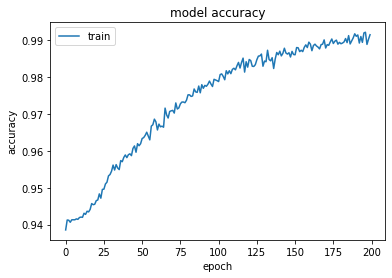

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

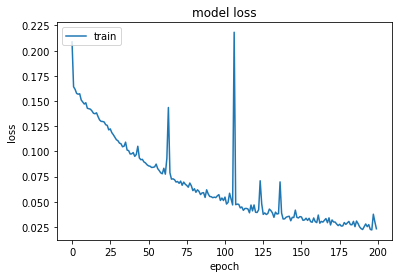

In [ ]:
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [ ]:
#from scikitplot.metrics import plot_confusion_matrix
prediction = model.predict(final_input_test)
print(prediction)

[[9.9561489e-01 4.3851277e-03 3.5408578e-09]
 [1.0000000e+00 2.9874200e-11 0.0000000e+00]
 [9.2877990e-01 7.1220152e-02 1.0877896e-08]
 ...
 [9.9999988e-01 1.2644033e-07 1.2420842e-12]
 [9.9999952e-01 4.1833329e-07 6.4697638e-26]
 [9.9145472e-01 8.5453494e-03 8.2418783e-13]]


In [ ]:
max_given_input = np.argmax(test_labels, axis=1)
max_predicted_output = np.argmax(prediction, axis=1)
print(max_given_input)
print(max_predicted_output)

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


In [ ]:
s = pd.Series(max_given_input)
s.value_counts()

0    6533
1     469
2       7
dtype: int64

In [ ]:
s.value_counts(normalize=True) * 100

0    93.208732
1     6.691397
2     0.099872
dtype: float64

In [ ]:
!pip install scikit-plot

0 = Land Plane, 1 = helicopter, 2 = Amphibian

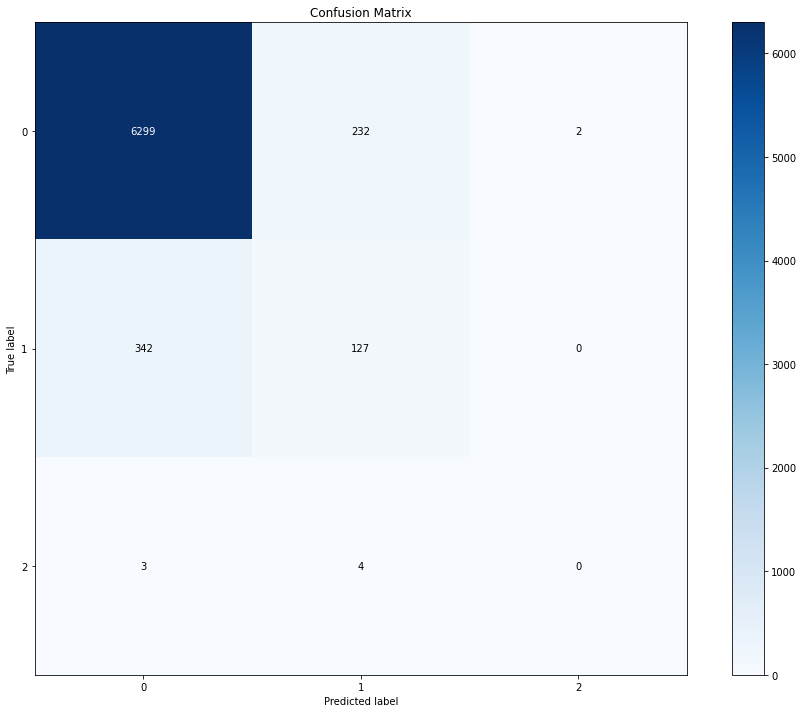

In [ ]:
from scikitplot.metrics import plot_confusion_matrix

fig, ax = plt.subplots(figsize=(16,12))
plot_confusion_matrix(max_given_input, max_predicted_output, ax=ax)


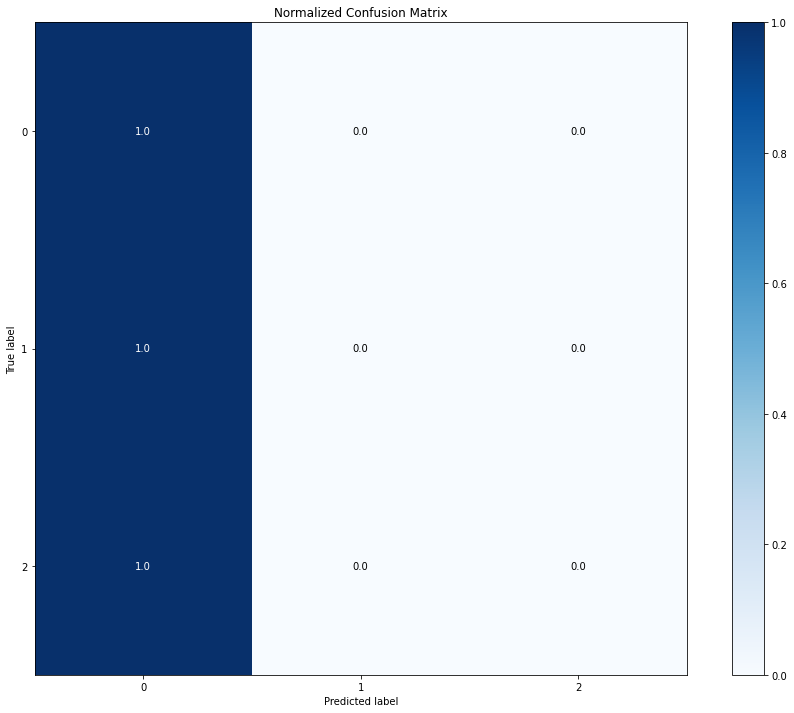

In [ ]:
from scikitplot.metrics import plot_confusion_matrix

fig, ax = plt.subplots(figsize=(16,12))
plot_confusion_matrix(max_given_input, max_predicted_output, ax=ax, normalize = 'true')
